In [1]:
import pandas as pd

fish_df = pd.read_csv("fish.csv")

fish_df

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...
154,Smelt,12.2,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,14.3,15.2,2.8728,2.0672


In [2]:
fish_df["Species"].value_counts()

Species
Perch        56
Bream        35
Roach        20
Pike         17
Smelt        14
Parkki       11
Whitefish     6
Name: count, dtype: int64

In [5]:
import numpy as np

perch_data = fish_df[fish_df["Species"] == "Perch"]
perch_length = np.array(perch_data["Length"].tolist())
perch_weight = np.array(perch_data["Weight"].tolist())

print(f"도미 데이터 개수: {len(perch_data)}")
print(f"길이: {perch_length}")
print(f"무게: {perch_weight}")

도미 데이터 개수: 56
길이: [ 8.4 13.7 15.  16.2 17.4 18.  18.7 19.  19.6 20.  21.  21.  21.  21.3
 22.  22.  22.  22.  22.  22.5 22.5 22.7 23.  23.5 24.  24.  24.6 25.
 25.6 26.5 27.3 27.5 27.5 27.5 28.  28.7 30.  32.8 34.5 35.  36.5 36.
 37.  37.  39.  39.  39.  40.  40.  40.  40.  42.  43.  43.  43.5 44. ]
무게: [   5.9   32.    40.    51.5   70.   100.    78.    80.    85.    85.
  110.   115.   125.   130.   120.   120.   130.   135.   110.   130.
  150.   145.   150.   170.   225.   145.   188.   180.   197.   218.
  300.   260.   265.   250.   250.   300.   320.   514.   556.   840.
  685.   700.   700.   690.   900.   650.   820.   850.   900.  1015.
  820.  1100.  1000.  1100.  1000.  1000. ]


In [6]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score

# 데이터 준비 (1차원 → 2차원 변환 필요)
X = perch_length.reshape(-1, 1)  # 길이를 특성으로
y = perch_weight  # 무게를 타겟으로

# 훈련-테스트 분할
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 모델 훈련
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)

# 예측 및 평가
y_pred = knn.predict(X_test)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"R² Score: {r2:.4f}")
print(f"MAE: {mae:.4f}")

R² Score: 0.9933
MAE: 21.4333


In [7]:
def find_optimal_k(X, y, k_range=range(1, 21)):
    """최적의 k값을 찾는 함수"""
    best_k = 1
    best_score = -np.inf

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

    for k in k_range:
        print(f"k = {k}")
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(X_train, y_train)
        score = knn.score(X_test, y_test)

        if score > best_score:
            best_score = score
            best_k = k

    return best_k, best_score


optimal_k, best_score = find_optimal_k(X, y)
print(f"최적 k: {optimal_k}, 최고 점수: {best_score:.4f}")

k = 1
k = 2
k = 3
k = 4
k = 5
k = 6
k = 7
k = 8
k = 9
k = 10
k = 11
k = 12
k = 13
k = 14
k = 15
k = 16
k = 17
k = 18
k = 19
k = 20
최적 k: 5, 최고 점수: 0.9933


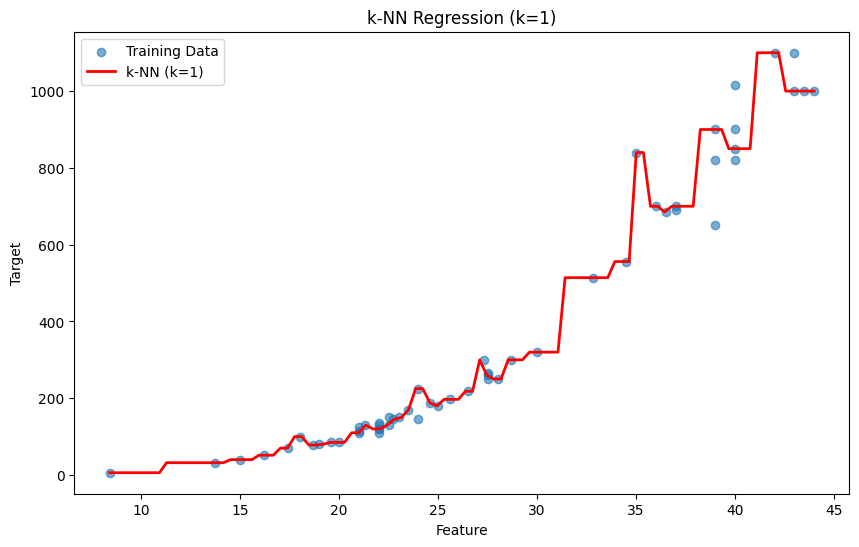

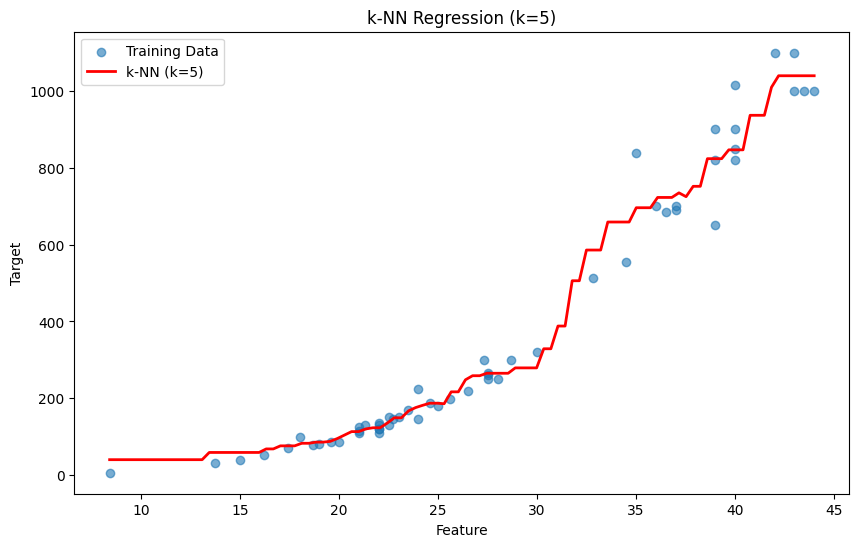

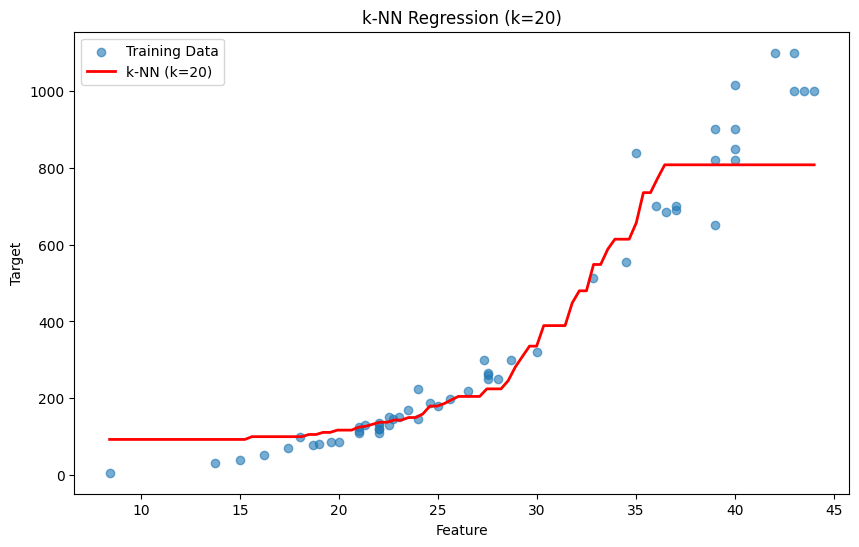

In [8]:
import matplotlib.pyplot as plt


def plot_regression_results(X, y, k=5):
    """k-NN 회귀 결과 시각화"""
    # 모델 훈련
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X, y)

    # 예측선 그리기 위한 구간 생성
    x_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
    y_pred_range = knn.predict(x_range)

    # 시각화
    plt.figure(figsize=(10, 6))
    plt.scatter(X, y, alpha=0.6, label="Training Data")
    plt.plot(x_range, y_pred_range, "r-", linewidth=2, label=f"k-NN (k={k})")
    plt.xlabel("Feature")
    plt.ylabel("Target")
    plt.title(f"k-NN Regression (k={k})")
    plt.legend()
    plt.show()


# 다양한 k값으로 시각화
for k in [1, 5, 20]:
    plot_regression_results(X, y, k)